In [1]:
import os, shutil

In [2]:
# The path to the directory where the original dataset was uncompressed
original_dataset_dir = '/gpfs/users/lopezs/data/CCDimg'

In [3]:
# The directory where we will store our dataset with the cropped images
base_dir = 'cropped_images'
os.mkdir(base_dir)

In [15]:
#copying all images to new directory

files = os.listdir(original_dataset_dir)
for f in files:
    shutil.copy(os.path.join(original_dataset_dir, f), '/gpfs/users/lopezs/data/cropped_images')

#PROBLEM: AN EXISTING DIRECTORY DOESNT LET US COPY THE IMAGES

IsADirectoryError: [Errno 21] Is a directory: '/gpfs/users/lopezs/data/CCDimg/.ipynb_checkpoints'

In [19]:
files

['CCDSensor_PV_210a83z_s1_N500_image_evt_166_ccd_2_ind_0_pdg_11.npz',
 'CCDSensor_PV_32a14z_s1_N500_image_evt_260_ccd_2_ind_0_pdg_11.npz',
 'ColdCopper_PV_208a81z_s40_N30000_image_evt_8884_ccd_1_ind_0_pdg_11.npz',
 'CCDSensor_PV_210a82z_s1_N500_image_evt_116_ccd_1_ind_0_pdg_11.npz',
 'CCDSensor_PV_210a83z_s1_N500_image_evt_12_ccd_2_ind_0_pdg_11.npz',
 'CCDSensor_PV_210a84z_s1_N50_image_evt_18_ccd_2_ind_0_pdg_11.npz',
 'ColdCopper_PV_208a81z_s40_N30000_image_evt_1449_ccd_1_ind_2_pdg_11.npz',
 'CCDSensor_PV_32a14z_s1_N500_image_evt_357_ccd_2_ind_0_pdg_11.npz',
 'CCDSensor_PV_210a83z_s1_N500_image_evt_30_ccd_1_ind_0_pdg_11.npz',
 'CCDSensor_PV_210a82z_s1_N500_image_evt_337_ccd_1_ind_0_pdg_11.npz',
 'CCDSensor_PV_32a15z_s1_N500_image_evt_364_ccd_1_ind_1_pdg_11.npz',
 'CCDSensor_PV_32a15z_s1_N500_image_evt_126_ccd_2_ind_0_pdg_11.npz',
 'CCDSensor_PV_210a83z_s1_N500_image_evt_130_ccd_2_ind_0_pdg_11.npz',
 'CCDSensor_PV_32a15z_s1_N500_image_evt_309_ccd_1_ind_0_pdg_11.npz',
 'CCDSensor_PV_210a

In [12]:
#i detected that at least one file is a directory called: '.ipynb_checkpoints'
#so i will remove it
i=0 #counter, so we see how many files are not valid
files = os.listdir(original_dataset_dir)
for f in files:
    if (os.path.splitext(f)[0] == '.ipynb_checkpoints'): #os.path.splitext(f)[0] selects the name of the file
        shutil.rmtree(os.path.join(original_dataset_dir, f))
        i=i+1
        print(i)
        
#so now, we can copy all images to the directory 'cropped_images' to crop them

1


In [3]:
import numpy as np

In [4]:
ls

CCDimg/            cropped_images/           plots_particles/
crop_images.ipynb  dividing_particles.ipynb


In [43]:
#destination directory 
dest = base_dir

#x=0
#y=0


#list of the files in the original dataset
files = os.listdir(original_dataset_dir)
for index, file in enumerate(files):  #'index' is the number of the file, and 'file' is the name of the file
    energy_a = np.load(os.path.join(original_dataset_dir, files[index]))['energy'] #loading each image as a numpy array
    noise_a = np.load(os.path.join(original_dataset_dir, files[index]))['noise']
    
    #cropping images with energy
    coords = np.argwhere(energy_a)
    x_min, y_min = coords.min(axis=0)
    x_max, y_max = coords.max(axis=0)
    energy_b = cropped = energy_a[x_min:x_max+1, y_min:y_max+1]
    
    #determinating biggest window available
    #if (x_max-x_min) > x:
    #    x = x_max-x_min
    #if (y_max - y_min) > y:
    #    y = y_max-y_min
        

    #reshaping
    
    
    
    #copying to the 'cropped_images' directory
    np.savez(os.path.join(dest, file), energy=energy_b, noise=noise_a)
   
    #shutil.copy(os.path.join(original_dataset_dir, b), '/gpfs/users/lopezs/data/cropped_images')

In [44]:
import matplotlib.pyplot as plt

In [46]:
#proving that the pictures are cropped correctly
files_cropped = os.listdir(base_dir)

energy_particle = np.load(os.path.join(base_dir, files[0]))['energy'] 
noise_particle = np.load(os.path.join(base_dir, files[0]))['noise']

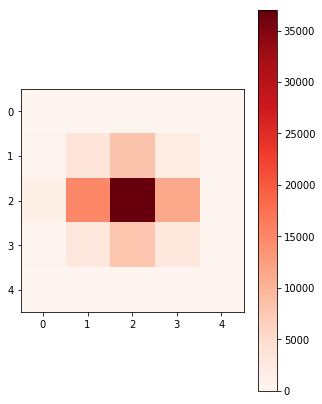

In [48]:
#cropped images for the energy!!!!!!

plt.figure(figsize=(5,7))
plt.imshow(energy_particle, cmap='Reds')
plt.colorbar()

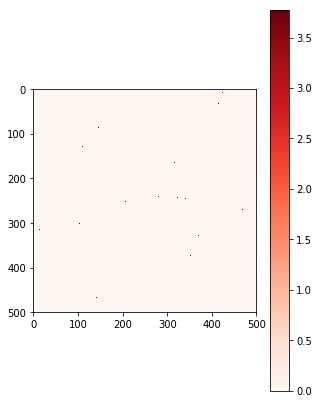

In [50]:
#non cropped images for the noise (as i dont know if there's a need to crop them)

plt.figure(figsize=(5,7))
plt.imshow(noise_particle, cmap='Reds')
plt.colorbar()

In [6]:
cropped = os.listdir('cropped_images')

In [7]:
len(cropped)

853

In [8]:
files = os.listdir(original_dataset_dir)

In [9]:
len(files)

2673